В этом кейсе мы познакомимся с тем, как проводить EDA на примере исследования о благополучии детей. EDA поможет нам первично проверить гипотезу о влиянии условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

В датасете представлены следующие данные:
 - school — аббревиатура школы, в которой учится ученик
 - sex — пол ученика ('F' - женский, 'M' - мужской)
 - age — возраст ученика (от 15 до 22)
 - address — тип адреса ученика ('U' - городской, 'R' - за городом)
 - famsize — размер семьи('LE3' <= 3, 'GT3' >3)
 - Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
 - Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
 - Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
 - Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
 - Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
 - reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
 - guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
 - traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
 - studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
 - failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
 - schoolsup — дополнительная образовательная поддержка (yes или no)
 - famsup — семейная образовательная поддержка (yes или no)
 - paid — дополнительные платные занятия по математике (yes или no)
 - activities — дополнительные внеучебные занятия (yes или no)
 - nursery — посещал детский сад (yes или no)
 - higher — хочет получить высшее образование (yes или no)
 - internet — наличие интернета дома (yes или no)
 - romantic — в романтических отношениях (yes или no)
 - famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
 - freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
 - goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
 - health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
 - absences — количество пропущенных занятий
 - score — баллы по госэкзамену по математике

Импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.xls')

## Первичный осмотр данных 

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [2]:
display(stud.sample(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
251,GP,M,16,U,GT3,T,3.0,3.0,at_home,other,reputation,other,3.0,2.0,0.0,yes,yes,no,no,no,-6.0,yes,NaN,no,5.0,3.0,3.0,2.0,6.0,50.0
155,GP,M,15,R,GT3,T,2.0,3.0,at_home,services,course,mother,1.0,2.0,0.0,yes,no,yes,yes,yes,-6.0,yes,NaN,NaN,4.0,4.0,4.0,1.0,2.0,40.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,NaN,4.0,2.0,3.0,no,no,NaN,yes,yes,-6.0,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
256,GP,F,17,U,LE3,T,4.0,2.0,teacher,services,reputation,mother,1.0,4.0,0.0,no,yes,NaN,yes,yes,-12.0,yes,yes,no,4.0,2.0,3.0,NaN,6.0,65.0
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0
334,GP,F,18,R,GT3,T,2.0,2.0,at_home,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,-12.0,yes,no,no,4.0,4.0,4.0,4.0,0.0,0.0
169,GP,F,16,U,GT3,T,4.0,4.0,health,NaN,reputation,mother,1.0,2.0,0.0,no,NaN,yes,no,yes,-6.0,yes,yes,yes,4.0,4.0,2.0,3.0,0.0,70.0
214,GP,F,17,R,LE3,T,4.0,4.0,services,other,other,mother,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,no,no,5.0,2.0,1.0,3.0,12.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
246,GP,M,17,U,GT3,T,2.0,3.0,other,other,course,father,2.0,1.0,0.0,no,NaN,NaN,no,yes,-3.0,yes,yes,no,5.0,2.0,2.0,2.0,4.0,65.0


In [3]:
# Проверим, не содержат ли данные дубликаты
stud[stud.duplicated(keep=False)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score


Дублирующих строк не обнаружено. Это очень хорошо.

In [4]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Очень скудные данные, всего 395 учеников, да еще и не все данные на месте.

Ага! У нас появился неопознанный столбец "studytime, granular". Для удобства использования pandas переименуем название этого столбца:

In [5]:
stud = stud.rename({"studytime, granular": "studytime_granular"}, axis=1)

## Первичный анализ данных в столбцах 

Рассмотрим все столбцы по отдельности

### school 

Посмотрим, сколько школ содержит наш датасет:

In [6]:
pd.DataFrame(stud.school.value_counts())

,school
GP,349
MS,46


Мда, негусто... Хорошо, что нет пустых значений.

### sex 

Посмотрим, нет ли пропусков в столбце, который показывает пол ученика:

In [7]:
pd.DataFrame(stud.sex.value_counts())

,sex
F,208
M,187


Ученики распределены по половому признаку примерно пополам. Пропусков нет и это замечательно.

### age 

Посмотрим распределение по возрасту:

In [8]:
pd.DataFrame(stud.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

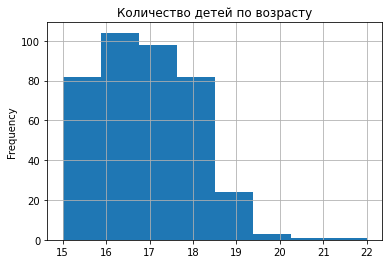

In [9]:
stud['age'].plot(kind='hist', grid=True,
                 title='Количество детей по возрасту', bins=8)
stud.age.describe()

Большая часть учеников распределена в интервале от 15 до 19 лет. Есть данные по нескольким ученикам в возрасте 20-22 лет.

### address 

In [10]:
display(pd.DataFrame(stud.address.value_counts()))

,address
U,295
R,83


Пустые значения заменим значениями 'U' и 'R' с частотой, с которой встречаются имеющиеся данные. Напишем функцию random_fix, которая будет принимать столбец датафрейма, считать пропуски в данных, заполнять пропуски с вероятностью появления имеющихся данных. 

In [11]:
def random_fix(column):
    # создадим переменную, которая будет показывать пустые строки
    nan = stud[column].isna()
    # считаем статистику распределения значений
    stat = stud[column].value_counts() / len(stud[column].dropna())
    # заполняем пропуски с вероятностью stat
    stud.loc[nan, column] = np.random.choice(
        stat.index.to_list(), size=nan.sum(), p=stat.to_list())


random_fix('address')
display(pd.DataFrame(stud.address.value_counts()))
stud.loc[:, ["address"]].info()

,address
U,308
R,87


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Избавились от пустых значений в столбце с адресом

### famsize

In [12]:
display(pd.DataFrame(stud.famsize.value_counts()))
stud.loc[:, ['famsize']].info()

,famsize
GT3,261
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


27 пустых ячеек о составе семьи. Так как данных мало, то опять придется заполнять случайными значениями с частотой, которой встречаются имеющиеся данные

In [13]:
random_fix('famsize')
display(pd.DataFrame(stud.famsize.value_counts()))
stud.loc[:, ["famsize"]].info()

,famsize
GT3,278
LE3,117


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### Pstatus 

In [14]:
display(pd.DataFrame(stud.Pstatus.value_counts()))
stud.loc[:, ['Pstatus']].info()

,Pstatus
T,314
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Снова заполним пропуски тем методом, который применяли на предыдущие столбцы

In [15]:
random_fix('Pstatus')
display(pd.DataFrame(stud.Pstatus.value_counts()))
stud.loc[:, ["Pstatus"]].info()

,Pstatus
T,354
A,41


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### Medu

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


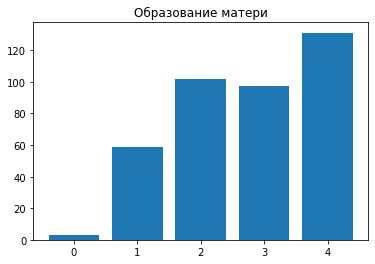

In [16]:
display(pd.DataFrame(stud.Medu.value_counts()))
Medu_group = stud['Medu'].value_counts()
fig, ax = plt.subplots()
ax.bar(Medu_group.index, Medu_group)
ax.set_title('Образование матери')
stud.loc[:, ['Medu']].info()

In [17]:
# Пропуски заполним медианой. Создадим функцию, которая заменяет пропуски на определенное значение:
def fix(column, x):    # column - столбец, в котором надо заполнить пропуски; x - значение, которое надо подставить вместо пропуска
    nan = stud[column].isna()
    stud.loc[nan, column] = x


fix('Medu', 2.0)
display(pd.DataFrame(stud.Medu.value_counts()))

,Medu
4.0,131
2.0,105
3.0,97
1.0,59
0.0,3


### Fedu

In [18]:
display(pd.DataFrame(stud.Fedu.value_counts()))
stud.loc[:, ['Fedu']].info()

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


В столбце 'Fedu' мы видим аномалию: строку со значением 40. Удалим строку с этим значением. Заменим пропуски на значение моды.

In [19]:
fix('Fedu', 2.0)
stud = stud.loc[stud.Fedu <= 4]
stud.loc[:, ['Fedu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    394 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


### Mjob 

In [20]:
display(pd.DataFrame(stud.Mjob.value_counts()))
stud.loc[:, ['Mjob']].info()

,Mjob
other,133
services,97
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    375 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


Заменим пропуски на 'other'.

In [21]:
fix('Mjob', 'other')
stud.loc[:, ['Mjob']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


### Fjob 

In [22]:
display(pd.DataFrame(stud.Fjob.value_counts()))
stud.loc[:, ['Fjob']].info()

,Fjob
other,196
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    358 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [23]:
# Также заменим пропуски на значение 'other'
fix('Fjob', 'other')
stud.loc[:, ['Fjob']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


### reason 

In [24]:
display(pd.DataFrame(stud.reason.value_counts()))
stud.loc[:, ['reason']].info()

,reason
course,137
home,104
reputation,102
other,34


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  377 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [25]:
# Пустые значения заменим случайными значениями с частотой, с которой встречаются имеющиеся данные
random_fix('reason')
display(pd.DataFrame(stud.reason.value_counts()))
stud.loc[:, ['reason']].info()

,reason
course,145
home,108
reputation,104
other,37


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


### guardian 

In [26]:
display(pd.DataFrame(stud.guardian.value_counts()))
stud.loc[:, ['guardian']].info()

,guardian
mother,250
father,85
other,28


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  363 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [27]:
# Заменим пропуски на значение 'mother'
fix('guardian', 'mother')
stud.loc[:, ['guardian']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


### traveltime 

In [28]:
display(pd.DataFrame(stud.traveltime.value_counts()))
stud.loc[:, ['traveltime']].info()

,traveltime
1.0,242
2.0,96
3.0,21
4.0,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  366 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [29]:
# Пустые значения заменим случайными значениями с частотой, с которой встречаются имеющиеся данные
random_fix('traveltime')
display(pd.DataFrame(stud.traveltime.value_counts()))
stud.loc[:, ['traveltime']].info()

,traveltime
1.0,254
2.0,108
3.0,24
4.0,8


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  394 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


### studytime 

In [30]:
display(pd.DataFrame(stud.studytime.value_counts()))
stud.loc[:, ['studytime']].info()

,studytime
2.0,194
1.0,103
3.0,63
4.0,27


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  387 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [31]:
# Пустые значения заменим случайными значениями с частотой, с которой встречаются имеющиеся данные
random_fix('studytime')
display(pd.DataFrame(stud.studytime.value_counts()))
stud.loc[:, ['studytime']].info()

,studytime
2.0,196
1.0,106
3.0,64
4.0,28


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  394 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


### failures 

In [32]:
display(pd.DataFrame(stud.failures.value_counts()))
stud.loc[:, ['failures']].info()

,failures
0.0,292
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  372 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [33]:
# Пропуски заменим на значение '0'
fix('failures', 0.0)
stud.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  394 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


### schoolsup 

In [34]:
display(pd.DataFrame(stud.schoolsup.value_counts()))
stud.loc[:, ['schoolsup']].info()

,schoolsup
no,334
yes,51


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  385 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [35]:
# Пропуски заменим на значение 'no'
fix('schoolsup', 'no')
stud.loc[:, ['schoolsup']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


### famsup 

In [36]:
display(pd.DataFrame(stud.famsup.value_counts()))
stud.loc[:, ['famsup']].info()

,famsup
yes,218
no,137


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  355 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [37]:
# Пропуски заменим случайными значениями с частотой, с которой встречаются имеющиеся данные
random_fix('famsup')
display(pd.DataFrame(stud.famsup.value_counts()))
stud.loc[:, ['famsup']].info()

,famsup
yes,237
no,157


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


### paid 

In [38]:
display(pd.DataFrame(stud.paid.value_counts()))
stud.loc[:, ['paid']].info()

,paid
no,199
yes,155


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    354 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [39]:
# Пропуски заменим случайными значениями с частотой, с которой встречаются имеющиеся данные
random_fix('paid')
display(pd.DataFrame(stud.paid.value_counts()))
stud.loc[:, ['paid']].info()

,paid
no,216
yes,178


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


### activities

In [40]:
display(pd.DataFrame(stud.activities.value_counts()))
stud.loc[:, ['activities']].info()

,activities
yes,194
no,186


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  380 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [41]:
# Пропуски заменим случайными значениями с частотой, с которой встречаются имеющиеся данные
random_fix('activities')
display(pd.DataFrame(stud.activities.value_counts()))
stud.loc[:, ['activities']].info()

,activities
yes,202
no,192


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


### nursery 

In [42]:
display(pd.DataFrame(stud.nursery.value_counts()))
stud.loc[:, ['nursery']].info()

,nursery
yes,299
no,79


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  378 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [43]:
# Пропуски заменим на значение 'yes'
fix('nursery', 'yes')
stud.loc[:, ['nursery']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


### higher

In [44]:
display(pd.DataFrame(stud.higher.value_counts()))
stud.loc[:, ['higher']].info()

,higher
yes,355
no,19


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  374 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [45]:
# Пропусков немного, заменим на значение 'yes'
fix('higher', 'yes')
stud.loc[:, ['higher']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


### internet 

In [46]:
display(pd.DataFrame(stud.internet.value_counts()))
stud.loc[:, ['internet']].info()

,internet
yes,304
no,56


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  360 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [47]:
# Пропуски заменим на значение 'yes'
fix('internet', 'yes')
stud.loc[:, ['internet']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


### romantic 

In [48]:
display(pd.DataFrame(stud.romantic.value_counts()))
stud.loc[:, ['romantic']].info()

,romantic
no,239
yes,124


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  363 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [49]:
# Пропуски заменим случайными значениями в пропорции, в которой встречаются имеющиеся данные
random_fix('romantic')
display(pd.DataFrame(stud.romantic.value_counts()))
stud.loc[:, ['romantic']].info()

,romantic
no,263
yes,131


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


### famrel 

In [50]:
display(pd.DataFrame(stud.famrel.value_counts()))
stud.loc[:, ['famrel']].info()

,famrel
4.0,182
5.0,98
3.0,62
2.0,17
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  367 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


В столбце 'famrel' мы видим аномалию: строку со значением -1. Удалим строку с этим значением. Пропуски заменим случайными значениями.

In [51]:
random_fix('famrel')
stud = stud.loc[stud.famrel > 0]
display(pd.DataFrame(stud.famrel.value_counts()))
stud.loc[:, ['famrel']].info()

,famrel
4.0,194
5.0,108
3.0,66
2.0,18
1.0,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  393 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


### freetime 

In [52]:
display(pd.DataFrame(stud.freetime.value_counts()))
stud.loc[:, ['freetime']].info()

,freetime
3.0,153
4.0,112
2.0,61
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  382 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [53]:
# Пропуски заменим значением моды
fix('freetime', 3.0)
stud.loc[:, ['freetime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  393 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


### goout

In [54]:
display(pd.DataFrame(stud.goout.value_counts()))
stud.loc[:, ['goout']].info()

,goout
3.0,127
2.0,99
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   385 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [55]:
# Пропуски заменим значением моды
fix('goout', 3.0)
stud.loc[:, ['goout']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   393 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


### health 

In [56]:
display(pd.DataFrame(stud.health.value_counts()))
stud.loc[:, ['health']].info()

,health
5.0,137
3.0,89
4.0,62
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  378 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [57]:
# Пропуски заменим на значение моды
fix('health', 5.0)
stud.loc[:, ['health']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  393 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


### absences 

,absences
0.0,111
2.0,60
4.0,52
6.0,31
8.0,21
10.0,17
12.0,12
14.0,11
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  381 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


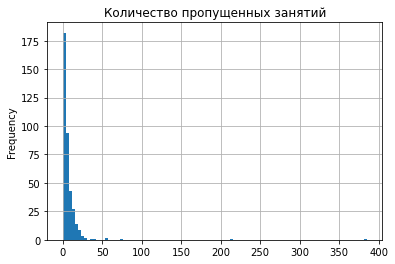

In [58]:
display(pd.DataFrame(stud.absences.value_counts()))
stud['absences'].plot(kind='hist', grid=True,
                      title='Количество пропущенных занятий', bins=100)
stud.loc[:, ['absences']].info()

Видим, что основное распределение лежит между 0 и 25 и есть потенциальные выбросы свыше 200. Удалим две строки с выбросами. Пропуски заменим случайными значениями в пропорции, в которой встречаются имеющиеся данные.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  391 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


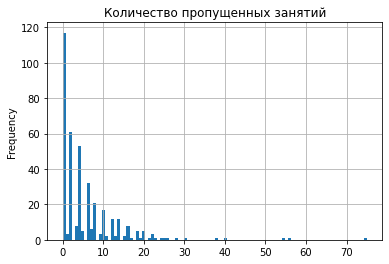

In [59]:
random_fix('absences')
stud = stud.loc[stud.absences <= 100]
stud['absences'].plot(kind='hist', grid=True,
                      title='Количество пропущенных занятий', bins=100)
stud.loc[:, ['absences']].info()

### score 

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,30
60.0,30
70.0,27
45.0,26
80.0,16


<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   385 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


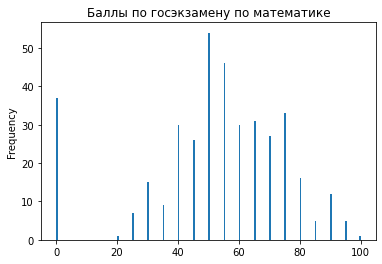

In [60]:
display(pd.DataFrame(stud.score.value_counts()))
stud['score'].plot(kind='hist',
                   title='Баллы по госэкзамену по математике', bins=200)
stud.loc[:, ['score']].info()

Итак, мы добрались до нашей целевой переменной. Видим, что и здесь не обошлось без пропусков. Целевая переменная не может содержать пустых значений, а также приблизительных или вероятных. Только истинные метки. Удалим строки с пустыми значениями.

In [61]:
stud = stud.loc[stud.score <= 100]
stud.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   385 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


Также мы видим, что у нас есть ученики, которые получили 0 баллов. Так как их много, около 10%, можно предположить, что сюда вошли те, кто набрал менее 20 баллов. 20 баллов - возможно проходной балл, так как далее оценочный шаг увеличивается на 5 баллов.

In [62]:
# Итак, посмотрим, все ли столбцы мы проверили на значения.
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              385 non-null    object 
 1   sex                 385 non-null    object 
 2   age                 385 non-null    int64  
 3   address             385 non-null    object 
 4   famsize             385 non-null    object 
 5   Pstatus             385 non-null    object 
 6   Medu                385 non-null    float64
 7   Fedu                385 non-null    float64
 8   Mjob                385 non-null    object 
 9   Fjob                385 non-null    object 
 10  reason              385 non-null    object 
 11  guardian            385 non-null    object 
 12  traveltime          385 non-null    float64
 13  studytime           385 non-null    float64
 14  failures            385 non-null    float64
 15  schoolsup           385 non-null    object 
 16  famsup  

Ага, мы чуть не забыли про нашу строку с неизвестным содержанием 'studytime_granular'. Проведем ее обработку.

### studytime_granular

,studytime_granular
-6.0,187
-3.0,102
-9.0,62
-12.0,27


<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 394
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   studytime_granular  378 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


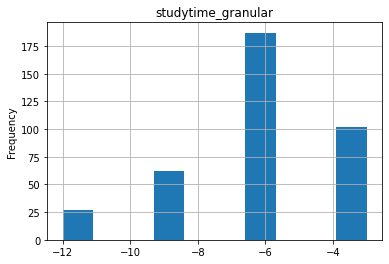

In [63]:
display(pd.DataFrame(stud.studytime_granular.value_counts()))
stud['studytime_granular'].plot(kind='hist', grid=True,
                                title='studytime_granular')
stud.loc[:, ['studytime_granular']].info()

In [64]:
# Пропуски заменим случайными значениями в пропорции, в которой встречаются имеющиеся данные
random_fix('studytime_granular')
display(pd.DataFrame(stud.studytime_granular.value_counts()))
stud.loc[:, ['studytime_granular']].info()

,studytime_granular
-6.0,190
-3.0,104
-9.0,63
-12.0,28


<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 394
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   studytime_granular  385 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


##  Корреляционный анализ

Выясним, какие столбцы коррелируют с баллами по госэкзамену по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

Корреляции рассмотрим только для числовых столбцов.

Text(0.5, 1.0, 'Баллы Vs Время на учебу в школе')

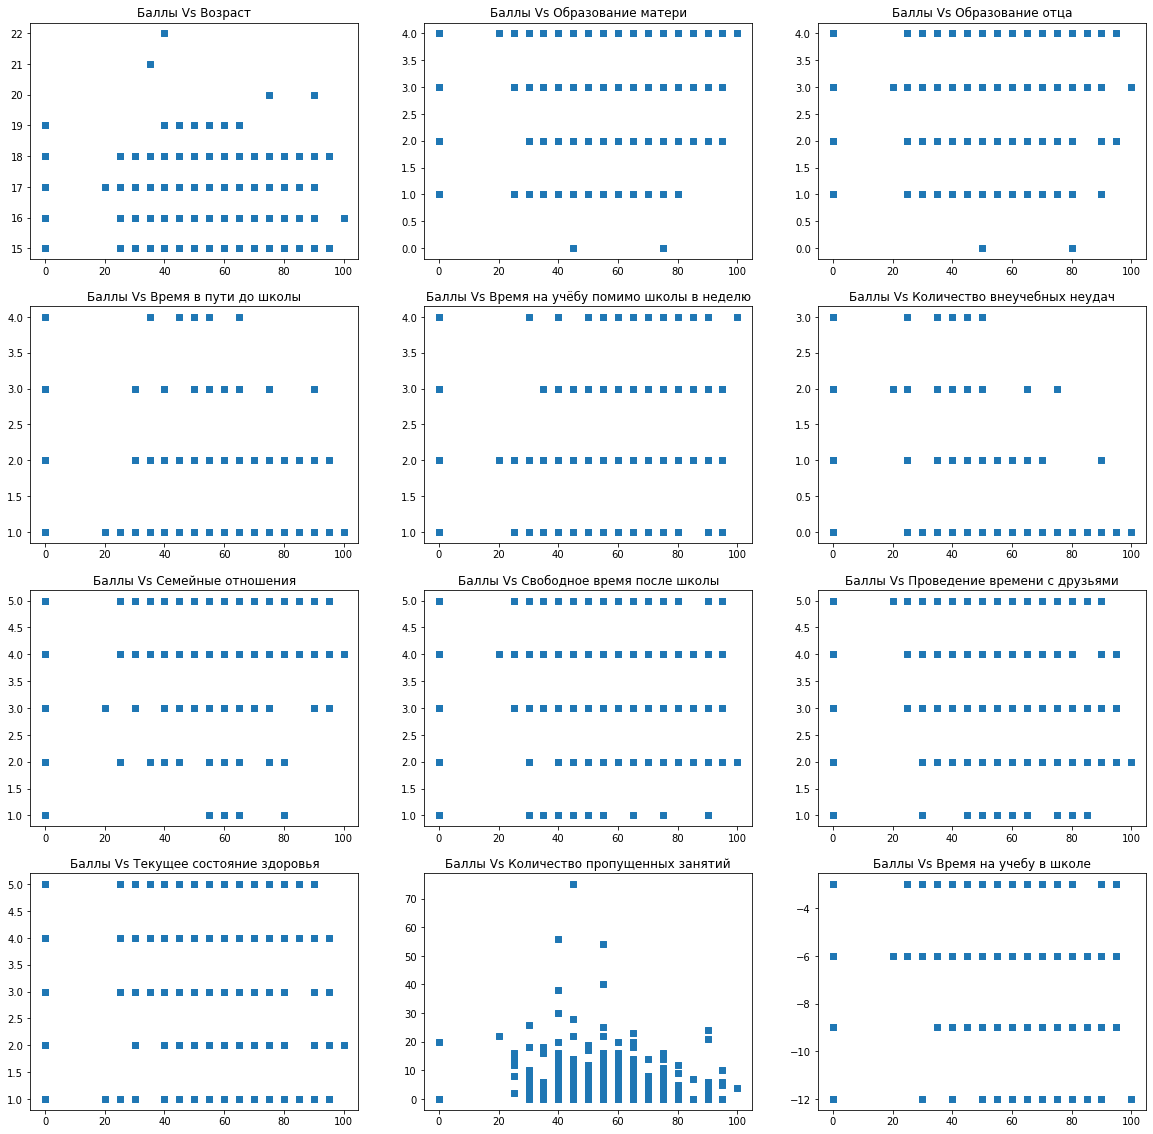

In [65]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
#fig.set_figwidth(12)     
#fig.set_figheight(12)
axes[0][0].scatter(x=stud['score'], y=stud['age'], marker='s')
axes[0][0].set_title('Баллы Vs Возраст')

axes[0][1].scatter(x=stud['score'], y=stud['Medu'], marker='s')
axes[0][1].set_title('Баллы Vs Образование матери')

axes[0][2].scatter(x=stud['score'], y=stud['Fedu'], marker='s')
axes[0][2].set_title('Баллы Vs Образование отца')

axes[1][0].scatter(x=stud['score'], y=stud['traveltime'], marker='s')
axes[1][0].set_title('Баллы Vs Время в пути до школы')

axes[1][1].scatter(x=stud['score'], y=stud['studytime'], marker='s')
axes[1][1].set_title('Баллы Vs Время на учёбу помимо школы в неделю')

axes[1][2].scatter(x=stud['score'], y=stud['failures'], marker='s')
axes[1][2].set_title('Баллы Vs Количество внеучебных неудач')

axes[2][0].scatter(x=stud['score'], y=stud['famrel'], marker='s')
axes[2][0].set_title('Баллы Vs Семейные отношения')

axes[2][1].scatter(x=stud['score'], y=stud['freetime'], marker='s')
axes[2][1].set_title('Баллы Vs Свободное время после школы')

axes[2][2].scatter(x=stud['score'], y=stud['goout'], marker='s')
axes[2][2].set_title('Баллы Vs Проведение времени с друзьями')

axes[3][0].scatter(x=stud['score'], y=stud['health'], marker='s')
axes[3][0].set_title('Баллы Vs Текущее состояние здоровья')

axes[3][1].scatter(x=stud['score'], y=stud['absences'], marker='s')
axes[3][1].set_title('Баллы Vs Количество пропущенных занятий')

axes[3][2].scatter(x=stud['score'], y=stud['studytime_granular'], marker='s')
axes[3][2].set_title('Баллы Vs Время на учебу в школе')

Используем для наглядности матрицу корреляций:

In [66]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.147813,-0.137966,0.063693,-0.020442,0.196678,0.007520,0.060252,-0.004616,0.110387,-0.062797,0.174405,-0.153539
Medu,-0.147813,1.000000,0.596957,-0.170317,0.075925,-0.236640,-0.076717,0.006178,0.033149,0.066883,-0.062848,0.093338,0.220242
Fedu,-0.137966,0.596957,1.000000,-0.159842,0.011743,-0.257776,0.012662,-0.014110,-0.017376,0.052745,-0.014859,0.020325,0.121635
traveltime,0.063693,-0.170317,-0.159842,1.000000,-0.123390,0.089185,0.125618,-0.048896,-0.060022,0.003937,0.025266,-0.021402,-0.106308
studytime,-0.020442,0.075925,0.011743,-0.123390,1.000000,-0.161064,-0.958781,-0.001441,-0.143671,-0.064817,-0.052332,-0.067384,0.108884
failures,0.196678,-0.236640,-0.257776,0.089185,-0.161064,1.000000,0.154009,-0.034089,0.084414,0.101266,0.072114,0.075042,-0.336216
studytime_granular,0.007520,-0.076717,0.012662,0.125618,-0.958781,0.154009,1.000000,-0.012510,0.122776,0.056903,0.055868,0.062122,-0.106136
famrel,0.060252,0.006178,-0.014110,-0.048896,-0.001441,-0.034089,-0.012510,1.000000,0.163707,0.041639,0.100837,-0.019097,0.062773
freetime,-0.004616,0.033149,-0.017376,-0.060022,-0.143671,0.084414,0.122776,0.163707,1.000000,0.287888,0.070894,-0.063084,0.019380
goout,0.110387,0.066883,0.052745,0.003937,-0.064817,0.101266,0.056903,0.041639,0.287888,1.000000,-0.014571,0.047587,-0.121971


Видим почти полную отрицательную корреляцию между 'studytime' — время на учёбу помимо школы в неделю и 'studytime_granular', которая скорее всего обозначает время учебы в школе. Из более заметных связей можно заметить отношение количества внеучебных неудач на оценку("failures"), образование родителей ("Medu", "Fedu"). Еще можно заметить, что свободное время после школы ("freetime") почти никак не влияет на оценку, в отличие от проведения времени с друзьями ("goout"), котрое влияет отрицательно на оценку.

Также можно заметить не коррелирующие переменные: семейные отношения ("famrel") и количество пропущенных занятий ("absences")

## Анализ номинативных переменных

Посмотрим с помощью box-plot, различаются ли баллы по госэкзамену по математике в зависимости от значения качественных переменных.
Номинативные переменные, которые осталось рассмотреть: sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic.

In [67]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(8, 3))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:5])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

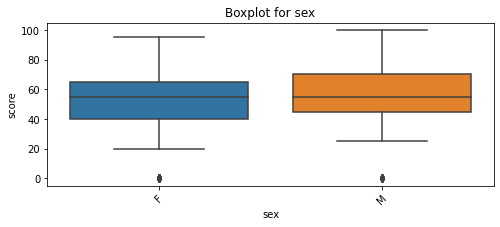

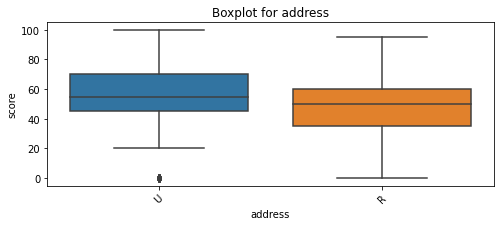

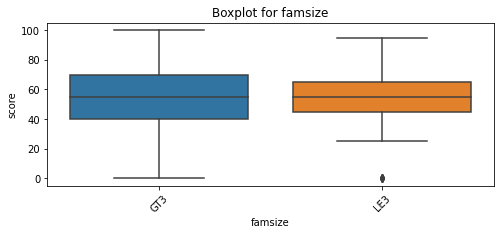

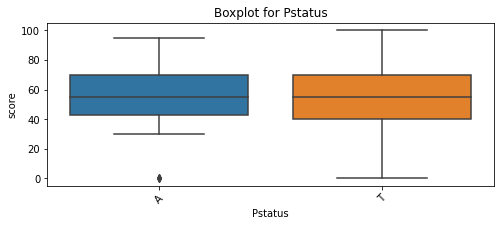

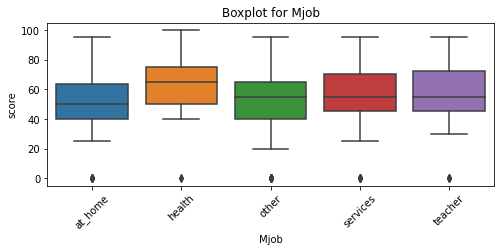

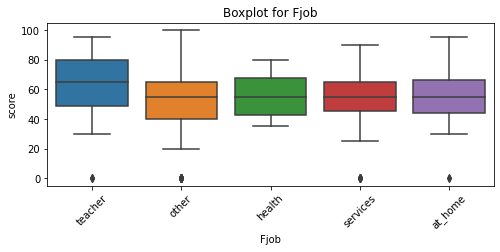

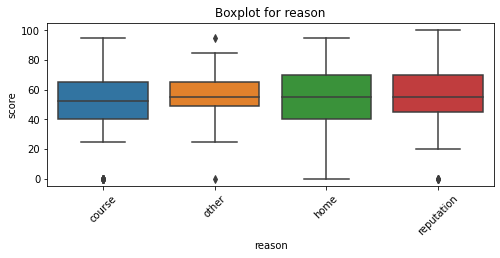

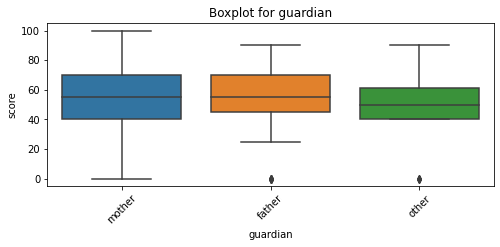

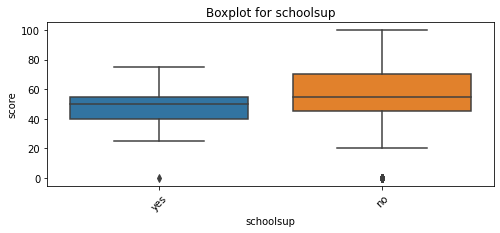

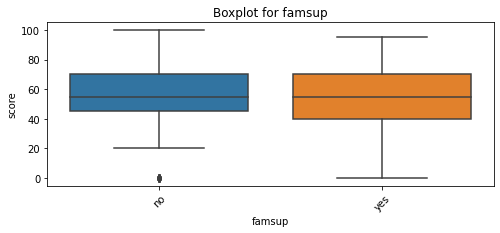

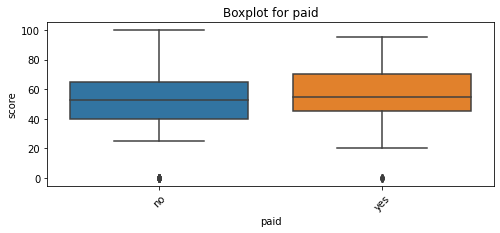

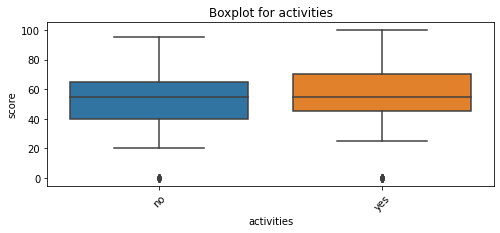

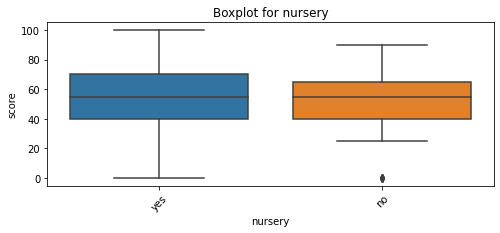

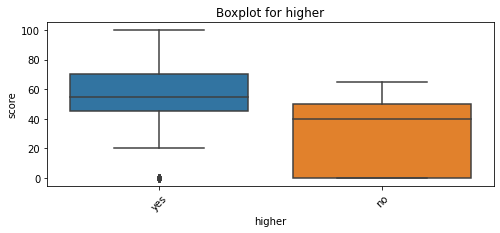

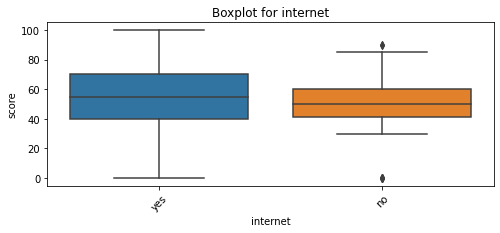

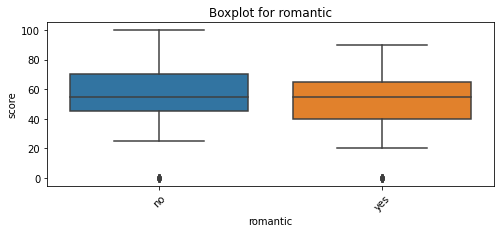

In [68]:
for col in ['sex',
            'address',
            'famsize',
            'Pstatus',
            'Mjob',
            'Fjob',
            'reason',
            'guardian',
            'schoolsup',
            'famsup',
            'paid',
            'activities',
            'nursery',
            'higher',
            'internet',
            'romantic']:
    get_boxplot(col)

По графикам похоже, что на оценку почти не влияют такие параметры как статус совместного жилья родителей ("Pstatus"), причина выбора школы ("reason"). 

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.

In [69]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [70]:
for col in ['sex',
            'address',
            'famsize',
            'Pstatus',
            'Mjob',
            'Fjob',
            'reason',
            'guardian',
            'schoolsup',
            'famsup',
            'paid',
            'activities',
            'nursery',
            'higher',
            'internet',
            'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Как мы видим, серьёзно отличаются такие параметры: sex, address, Mjob, higher и romantic. Оставим эти переменные в датасете для дальнейшего построения модели. 

Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: sex, address, Mjob, higher, romantic, failures, Medu, Fedu и goout.

In [71]:
stud_for_model = stud.loc[:, ['sex', 'address', 'Mjob',
                              'higher', 'romantic', 'failures', 'Medu', 'Fedu', 'goout']]
stud_for_model.head()

,sex,address,Mjob,higher,romantic,failures,Medu,Fedu,goout
0,F,U,at_home,yes,no,0.0,4.0,4.0,4.0
1,F,U,at_home,yes,no,0.0,1.0,1.0,3.0
2,F,U,at_home,yes,no,3.0,1.0,1.0,2.0
3,F,U,health,yes,yes,0.0,4.0,2.0,2.0
4,F,U,other,yes,no,0.0,3.0,3.0,2.0


## Выводы 

Настало время подвести выводы.

Итак, в результате EDA для анализа влияния условий жизни учащихся на их успеваемость по математике были получены следующие выводы:

 - В данных достаточно мало пустых значений.
 - Выбросов почти нет, найдены только в столбцах с количеством пропущенных занятий, что позволяет сделать вывод о том, что данные достаточно чистые.
 - Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это: пол ученика, тип адреса ученика, работа матери, хочет получить высшее образование или нет, в романтических отношениях или нет, количество внеучебных неудач, образование родителей, и количество проведенного времени с друзьями.